In [20]:
"""
Malaysian Election data Cluster Analysis via sklearn MeanShift by Jamie K
Questions to explore: 
1. Treating each age group as a dimension, are there (clustering) patterns for each constituency?
2. Are these patterns indicative of the outcome of the winning party?

"""
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
import warnings

warnings.filterwarnings('ignore')
style.use("ggplot")
%matplotlib notebook

In [21]:
ge14 = pd.read_excel("Tindak_GE14_Age.xlsx")

Treating each age group as a distinctive dimension, let’s run some Machine Learning algorithms to see if there are patterns within the constituencies that led to different electoral outcomes.

In [22]:
ge14_short = ge14[['namaparlimen','21 - 30 (%)','31 - 40 (%)','41 - 50 (%)',
                   #'51 - 60 (%)','61 - 70 (%)','71 - 80 (%)','81 - 90 (%)','Above 90 (%)',
                   'GE 2018 COALITION WINNER']]
ge14_short.loc[:,"GE 2018 COALITION WINNER"] = pd.Categorical(ge14_short.loc[:,"GE 2018 COALITION WINNER"])
ge14_short.loc[:,'coded_winner'] = ge14_short.loc[:,'GE 2018 COALITION WINNER'].cat.codes
ge14_short.loc[:,'meanshift_grp']= np.nan

In [23]:
ge14_short.set_index('namaparlimen', inplace = True)

In [24]:
X = np.array(ge14_short[['21 - 30 (%)','31 - 40 (%)','41 - 50 (%)',
                         #'51 - 60 (%)','61 - 70 (%)','71 - 80 (%)',
                         #'81 - 90 (%)','Above 90 (%)'
                        ]])
X = preprocessing.scale(X) #Convert data to Gaussian dataset (standard normal distribution)
Y = np.array(ge14_short['coded_winner']) #Convert winning coalition to numbered class categories (algorithm can't work with string labels)

Let’s start off with Hierarchal clustering; an unsupervised clustering method to allow the machine to analyze ‘without guidance’. This is similar to k-means with the exception that it will not require a specified number of clusters. Hierarchal clustering is a data clustering method that allows you to group data together according to the data centers (centroids). Ideally, since there are 6 unique types of political party outcomes in GE14 (Y2018 elections), we would like to see 6 distinct centers in the date points – that way, one can clearly state different age make-up of the constituency led to different electoral outcomes.

In [25]:
clf = MeanShift()
clf.fit(X)
colors = 10*['r','g','b','c','k','y','m']

In [26]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [27]:
for i in range(len(X)):
    ge14_short['meanshift_grp'].iloc[i] = labels[i]

In [28]:
ge14_short['meanshift_grp'].unique() #there are 3 clusters

array([ 0.,  1.,  2.])

In an ideal setting, we would see 6 clusters for the 6 different types of electoral outcome, however we only see 3 clusters. In the 3-dimensional plot below, you can explore these clusters. 

Note that I’ve chosen to only plot on 3-dimensions, representing the largest age groups in the constituencies: Age 21-30, Age 31-40, and Age 41-50. Together, these age groups account for an average of 61% of every constituency’s voters. Also, because age split is a zero-sum demographic detail, limiting the analysis to these three age groups analyzed would lead to similar results. Expounding a little more on ‘zero-sum’ demographic detail, think about this: if a higher percentage of the population falls in the Age 21-30 group, that will mean less percentage of the population fell in another age group. In other words, higher percentage of the population in one age group necessitates lower percentage of the population in another age group, forming a classic zero-sum game. Feel free to flip around the 3D plot to explore the clusters (X marks the center of the clusters).

Having 3 clusters for 6 possible electoral outcomes shows all constituencies are very homogeneous; that is they are heavier on voters below 50 years old. 

<IPython.core.display.Javascript object>


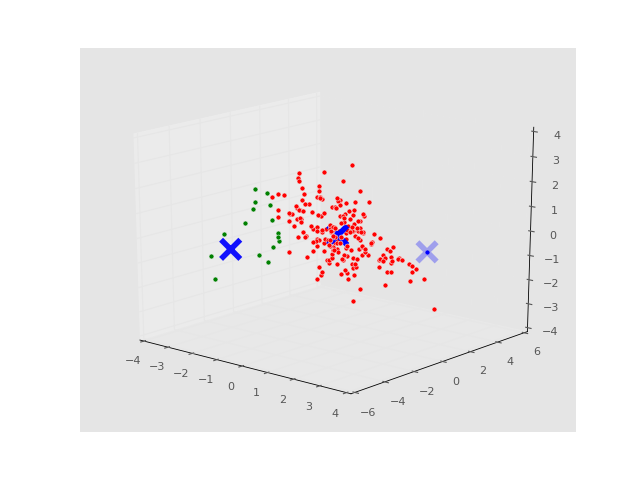

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')


ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=300, linewidths = 5, zorder=10)

plt.show()